# NE 204 Lab 1 - Tools for Energy Spectra

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.integrate as integrate
from scipy.optimize import curve_fit
import scipy.signal
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import HoverTool
import time
import pandas as pd

# import tool repo
import sys

sys.path.append('/Users/kalie/courses/ne204/lab/kalieknecht_lab1')
from tools import find_activity, import_data, subtract_baseline
from filters import fit_tau, fit_taus, TrapezoidalFilter

# sys.path.append('/Users/kalie/courses/ne204/lab/lab_partners/ne204lib')
# from kit204lib.spectrum import Spectrum
# from kit204lib.filters import jordanov_filter, cooper_filter
# from kit204lib.analyze_waveform import plot_pulses, fit_tau
# from kit204lib.make_histogram import make_histogram
# from scipy.signal import find_peaks, peak_prominences

## import and clean data

In [4]:
f_name = '../data/calibration.h5'
calibration, calibration_events = import_data(f_name)
calibration_bkg = subtract_baseline(calibration)

In [5]:
tau = 11099.251704766246
peaking_time = 100 * 4 * 10**(-9)#1.6e-6/2
gap_time = peaking_time * 3 #6.4e-6/4


In [6]:
trap_filter = TrapezoidalFilter(peaking_time, gap_time, tau)

In [7]:
# downsample data
calibration_down = calibration_bkg[::100]
calibration_down.shape

(9131, 5000)

In [8]:
filtered_waves = trap_filter.filter_waveform(calibration_down,normalize=False)

In [9]:
trap_heights = filtered_waves.max(axis=1)

<IPython.core.display.Javascript object>


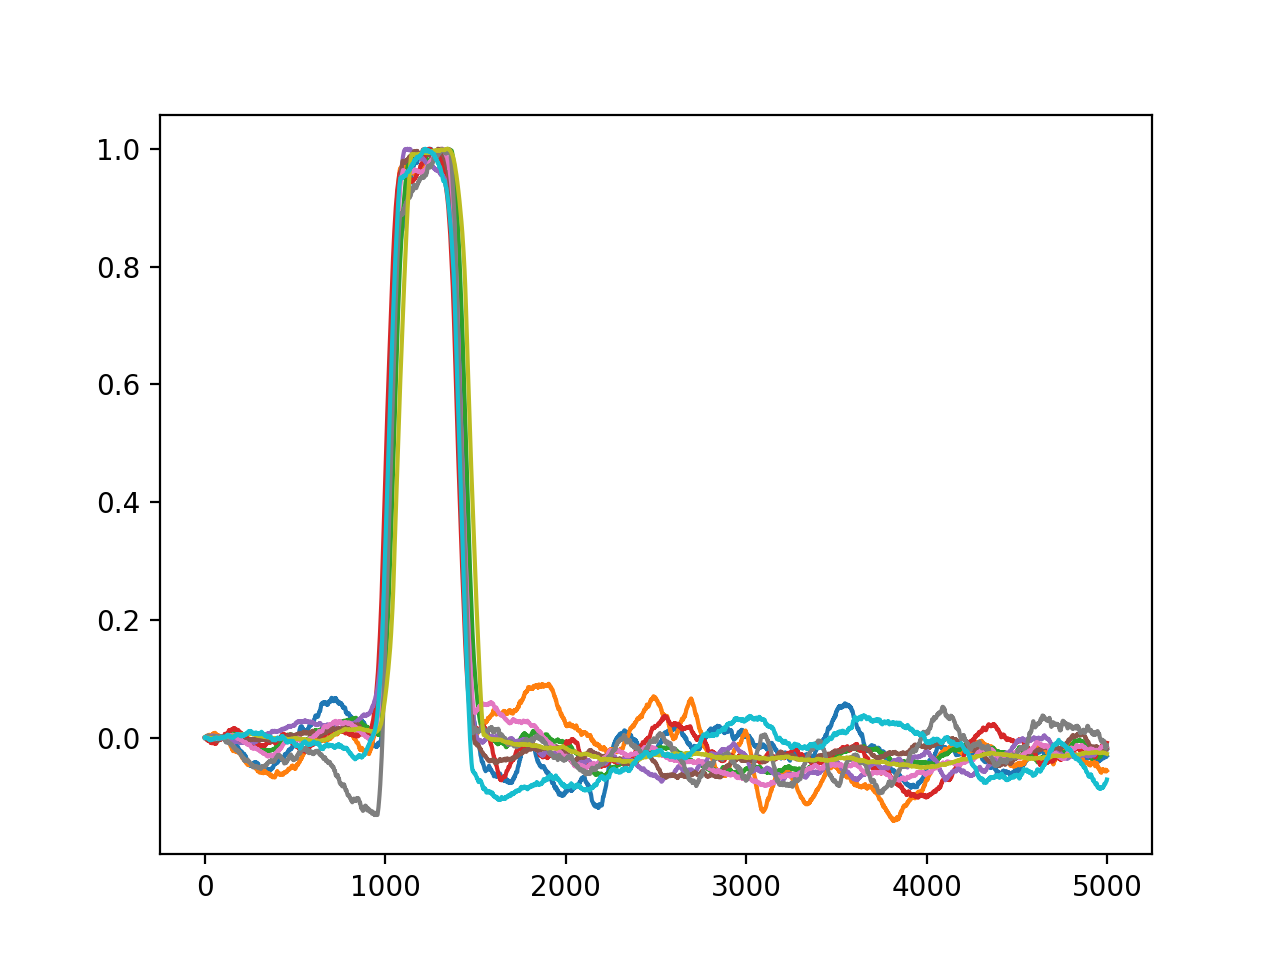

In [10]:
plt.figure()
num_traps = 10
for i in range(num_traps):
    n = int(np.random.rand() * len(filtered_waves))
    plt.plot(filtered_waves[n]/ max(filtered_waves[n]))
plt.show()

<IPython.core.display.Javascript object>


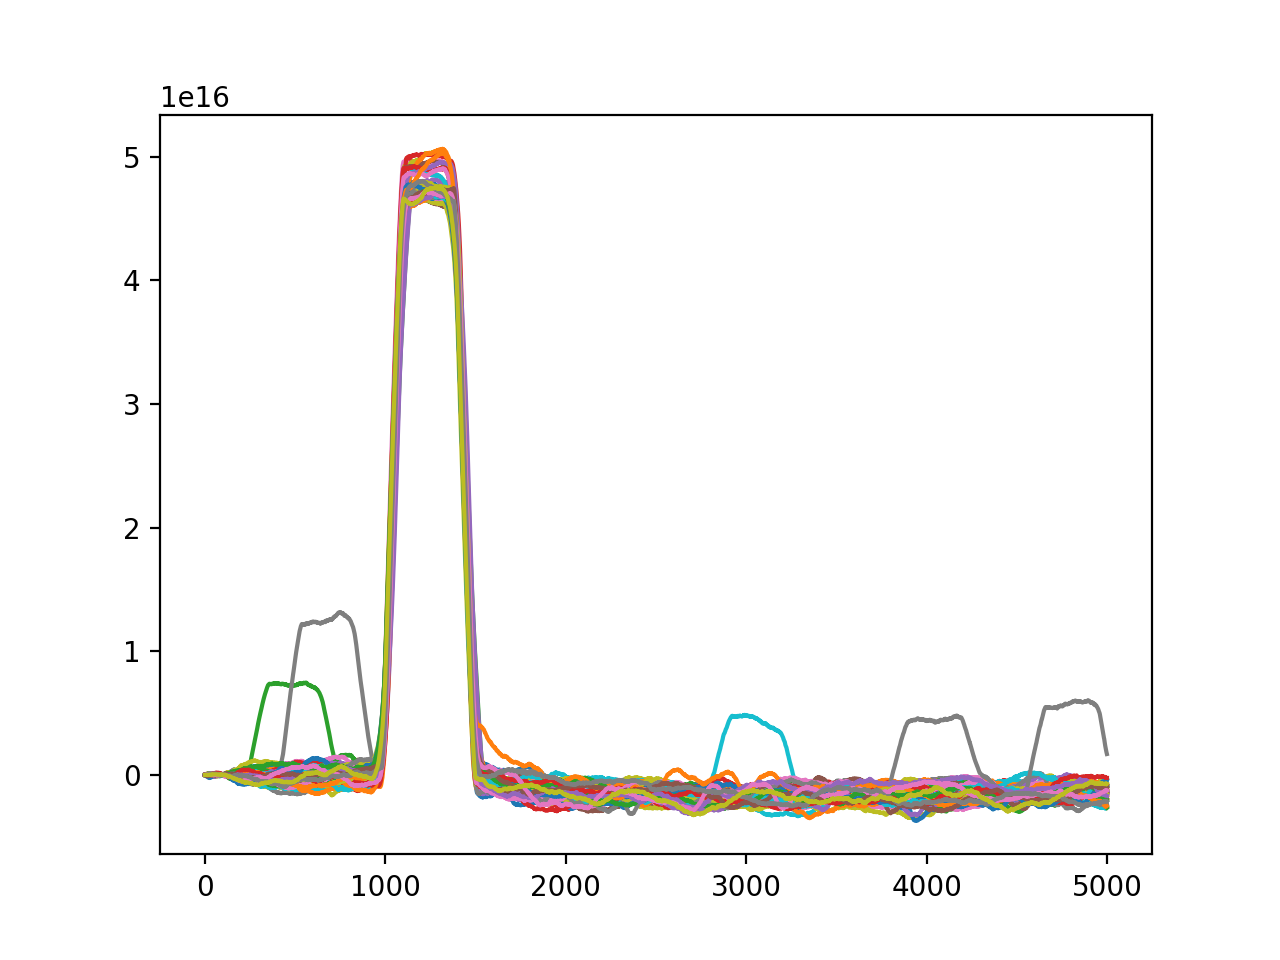

In [11]:
plt.figure()

iter = 0
for idx, val in enumerate(trap_heights):
    if val > 4.7 * 10**(16):
        if val < 5.1 * 10 ** (16):
            iter = iter + 1
            if iter < 50:
                plt.plot(filtered_waves[idx])
                #iter = iter + 1
plt.show()

<IPython.core.display.Javascript object>


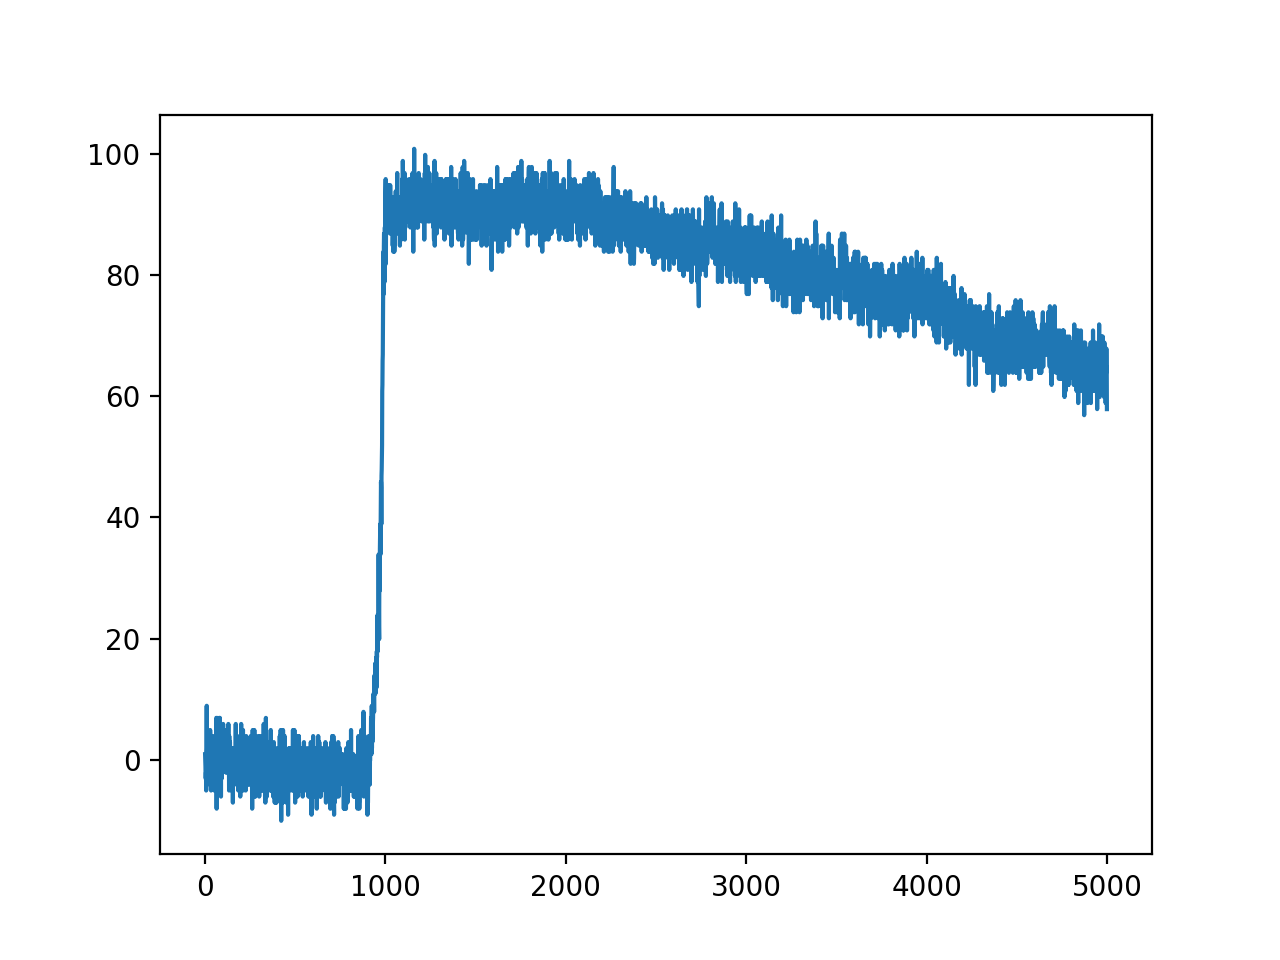

In [12]:
plt.figure()
plt.plot(calibration_down[idx])

In [ ]:
# pileups = np.ones(len(filtered_waves), dtype=bool)
# for idx, val in enumerate(filtered_waves):
#     if not all(i <= 10**15 for i in val[2000:]):
#         pileups[idx] = False

In [13]:
mask = np.any(filtered_waves[:,2000:] >= 0.5*10**16,axis=1)

In [14]:
pileup_filtered_waves = filtered_waves[~mask]

In [15]:
trap_heights = pileup_filtered_waves.max(axis=1)

<IPython.core.display.Javascript object>


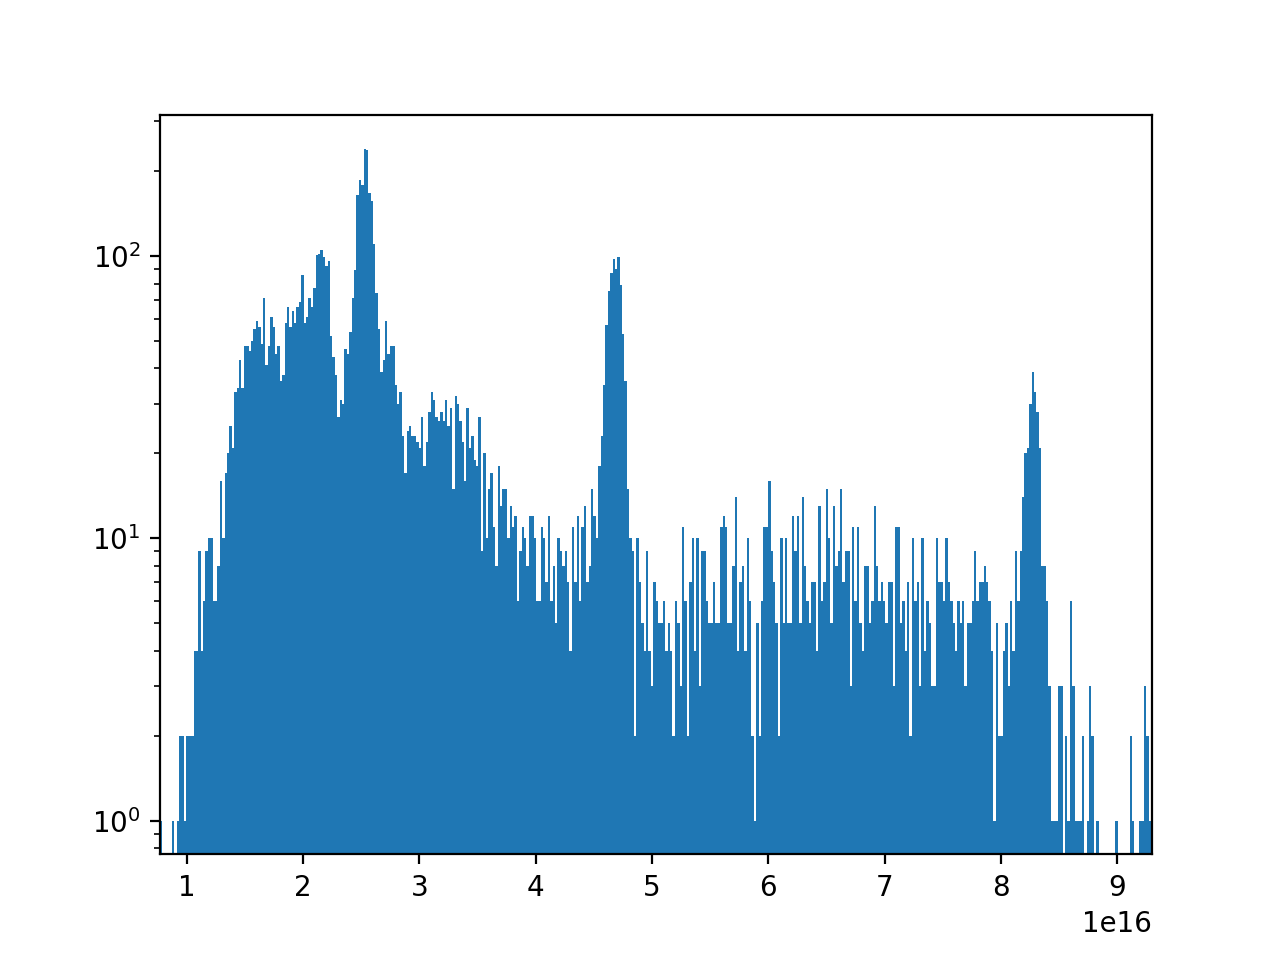

In [16]:
plt.figure()
plt.hist(trap_heights,bins=10000)
plt.xlim(trap_heights.min(),trap_heights.max()*.045)
plt.semilogy()
plt.show()

<IPython.core.display.Javascript object>


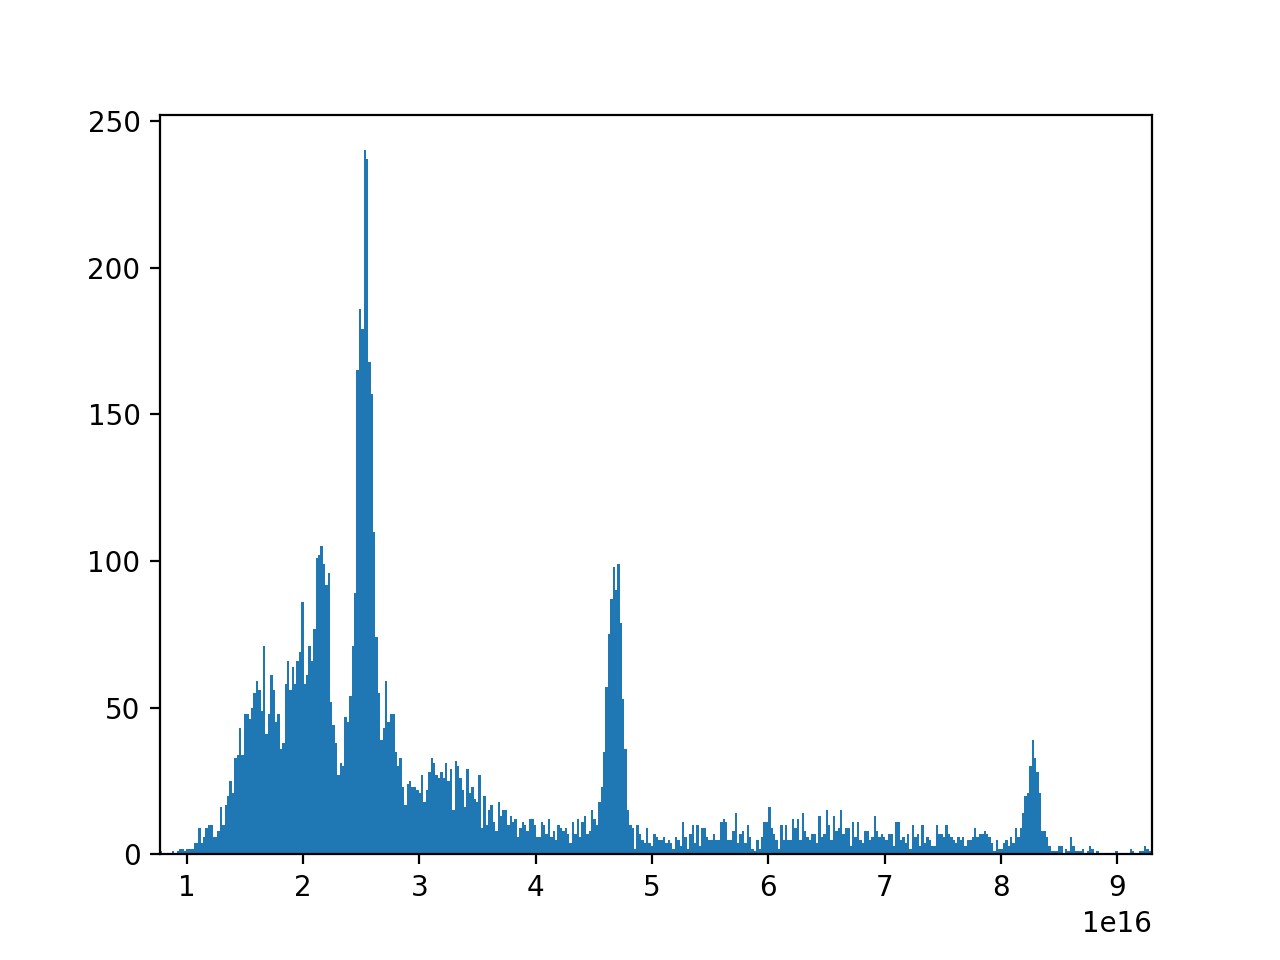

In [17]:
plt.figure()
plt.hist(trap_heights,bins=10000)
plt.xlim(trap_heights.min(),trap_heights.max()*.045)
plt.show()